Assignment 2 (due on 11/8)

学生：黄玮麟 (12332337)

批改人：Zhao Shuhui

得分：33/50

=========================================
# 1 Significant Earthquakes
18/25  
1.1 计算每个国家从BC2150开始的地震死亡人数，并输出最多的10个国家，附上相应人数  5/5  
1.2 计算每年全世界震级大于6.0的地震数量，并画出时间序列，在报告中陈述是否有趋势以及理由——完成了筛选工作；时间序列绘画失误，注意数量为0的年份 8/10  
1.3 创建CountEq_LargestEq方法，要求方法返回 1）给定国家从BC2150开始的地震数量；2）该国家最严重地震的发生日期。对数据集中的所有国家使用该方法，将得到的结果按地震数量从大到小排序——要求返回地震总数未满足；需要对nan项做出处理  5/10  

## 1.1

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import datetime as dt
from datetime import datetime

In [3]:
#1.1
Sig_Eqs=pd.read_csv(r"C:\Program1\jupyter_notebook\ese5023\earthquakes.tsv",sep="\t")
#aggregate deaths by region
total=Sig_Eqs.groupby(['Country']).sum()['Deaths']
#Descending arrangement
total.sort_values(ascending=False).head(10)

Country
CHINA         2075045.0
TURKEY        1188881.0
IRAN          1011449.0
ITALY          498478.0
SYRIA          439224.0
HAITI          323478.0
AZERBAIJAN     317219.0
JAPAN          279085.0
ARMENIA        191890.0
PAKISTAN       145083.0
Name: Deaths, dtype: float64

## 1.2

<Axes: xlabel='Year'>

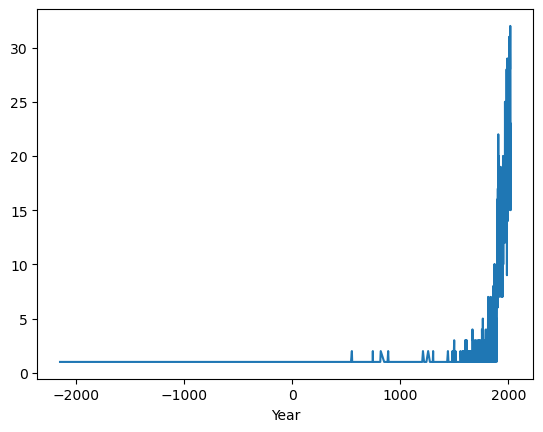

In [96]:
#1.2
Sig_Eqs['Number']=1
#The number of mag above 6
total_1=Sig_Eqs.loc[Sig_Eqs['Mag']>6.0].groupby(['Year']).sum()['Number']
total_1.plot.line()
#Earthquakes have been recorded more frequently since 1500. The reason may be the lack of documentation of previous earthquakes.

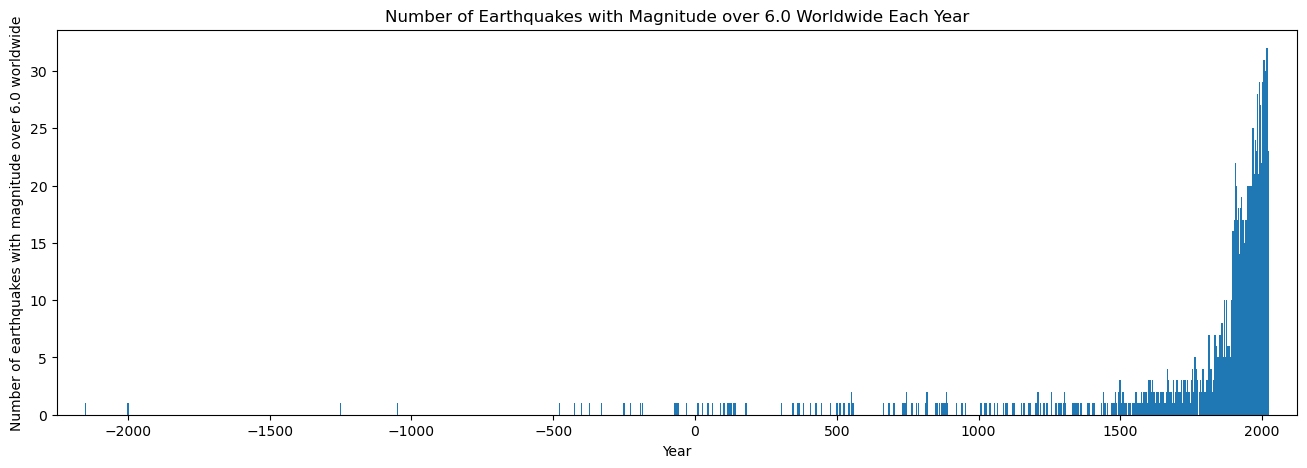

In [4]:
#1.2参考代码
#取Mag大于6的部分，根据年份进行分组，计算每组内有多少个数据
ysigeqs=Sig_Eqs[Sig_Eqs['Mag']>6].groupby(['Year'])['Mag'].count()
yearlist=ysigeqs.index
countlist=ysigeqs
# print(yearlist,countlist)

#设置图像大小，画柱状图，设置x轴范围和x/y坐标轴标签
plt.figure(figsize=(16,5))
plt.bar(yearlist,countlist,width=5)
plt.xlim(yearlist[0]-100,yearlist[-1]+100)
plt.xlabel('Year')
plt.ylabel('Number of earthquakes with magnitude over 6.0 worldwide')
plt.title('Number of Earthquakes with Magnitude over 6.0 Worldwide Each Year')
plt.show()

## 1.3

In [5]:
#1.3.1
def CountEq_LargestEq(country):  
    earthquakes = Sig_Eqs[Sig_Eqs['Country'] == country]
    #The earthquakes are ranked in descending mag order,with the first being the strongest earthquake.
    largest_earthquake = earthquakes.sort_values(by='Mag', ascending=False).iloc[0]  
    #the number of earthquakes
    count = len(earthquakes)
    return largest_earthquake['Year'],largest_earthquake['Mo'],largest_earthquake['Dy']
#Take China for example
CountEq_LargestEq("CHINA")

(1668.0, 7.0, 25.0)

In [98]:
#1.3.2
#Eliminate duplicate countries. I learned this line of code from the Internet
unique_countries = list(set(Sig_Eqs['Country']))
#Apply CountEq_LargestEq to every country in the file. I can't do descending here
for i in unique_countries:
    print(i)
    print(CountEq_LargestEq(i))

AZORES (PORTUGAL)
(1968.0, 2.0, 28.0)
CENTRAL AFRICAN REPUBLIC
(1921.0, 9.0, 16.0)
BURUNDI
(2004.0, 2.0, 24.0)
VENEZUELA
(1894.0, 4.0, 29.0)
SOUTH KOREA
(1700.0, 9.0, 12.0)
GABON
(1974.0, 9.0, 23.0)
LAOS
(2007.0, 5.0, 16.0)
TONGA
(1919.0, 4.0, 30.0)
VANUATU
(1913.0, 10.0, 14.0)
BULGARIA
(1904.0, 4.0, 4.0)
NORTH KOREA
(1518.0, 7.0, 2.0)
MONGOLIA
(1905.0, 7.0, 9.0)
GREECE
(1303.0, 8.0, 8.0)
TAIWAN
(1920.0, 6.0, 5.0)
AUSTRIA
(1590.0, 9.0, 15.0)
BARBADOS
(1831.0, 8.0, 11.0)
GRENADA
(1822.0, 12.0, 1.0)
ETHIOPIA
(1906.0, 8.0, 25.0)
CANADA
(1949.0, 8.0, 22.0)
MALAWI
(1989.0, 3.0, 10.0)
COLOMBIA
(1826.0, 6.0, 18.0)
LEBANON
(551.0, 7.0, 9.0)
KIRIBATI
(1905.0, 6.0, 30.0)
ARMENIA
(1988.0, 12.0, 7.0)
NETHERLANDS
(1992.0, 4.0, 13.0)
SAUDI ARABIA
(2009.0, 5.0, 19.0)
MADAGASCAR
(2017.0, 1.0, 11.0)
TUNISIA
(1957.0, 2.0, 20.0)
COMOROS
(2018.0, 5.0, 15.0)
SOLOMON SEA
(1895.0, 3.0, 6.0)
GERMANY
(1978.0, 9.0, 3.0)
HONDURAS
(1856.0, 8.0, 4.0)
MALAYSIA
(1976.0, 7.0, 26.0)
MEXICO
(1899.0, 1.0, 24.0)
AUSTRALI

IndexError: single positional indexer is out-of-bounds

In [6]:
#1.3参考代码

def CountEq_LargestEq(country):
    #取特定国家的数据，获取长度为地震数量
    eqn=len(Sig_Eqs[Sig_Eqs['Country']==country])
    #取特定国家的数据，根据Mag的值从大到小排序，第一列即震级最大的那次地震
    maMag=Sig_Eqs[Sig_Eqs['Country']==country].sort_values('Mag',ascending=False)
    #取第一列的日期
    yr=int(maMag.iloc[0].Year)
    mo=maMag.iloc[0].Mo
    dy=maMag.iloc[0].Dy
    if np.isnan(mo):
        date=f'year {yr:04}'
        # print(country,date)
    elif np.isnan(dy):
        mo=int(mo)
        date=f'year/month {yr:04d}/{mo:02d}'
        # print(country,date)
    else:
        mo=int(mo)
        dy=int(dy)
        date=f'{yr:04d}/{mo:02d}/{dy:02d}'
    return eqn,date

#去掉nan    
Sig_Eqs1=Sig_Eqs[~pd.isnull(Sig_Eqs['Country'])]
#获取各个国家到list
countrylist=Sig_Eqs1['Country'].unique()
#对每个城市都使用方法，收集到一个DataFrame里
eqnlist=[]
datelist=[]
for country in countrylist:
    eqn,date=CountEq_LargestEq(country)
    eqnlist.append(eqn)
    datelist.append(date)
df1=pd.DataFrame()
df1['country']=countrylist
df1['number Of earthquakes']=eqnlist
df1['the date of the largest earthquake']=datelist
#根据地震数量从大到小排列
df1=df1.sort_values('number Of earthquakes',ascending=False)
df1

,country,number Of earthquakes,the date of the largest earthquake
14,CHINA,620,1668/07/25
33,JAPAN,414,2011/03/11
68,INDONESIA,411,2004/12/26
7,IRAN,384,0856/12/22
9,TURKEY,335,2023/02/06
...,...,...,...
93,NORWAY,1,1819/08/31
126,CENTRAL AFRICAN REPUBLIC,1,1921/09/16
124,PALAU,1,1914/10/23
118,KIRIBATI,1,1905/06/30


=========================================
# 2 Windspeed
3/10  
以时间为x轴画出月平均风速，在报告中回答是否观察到某种趋势；同时在报告中说明你是如何筛选数据的——完成了对WND列的分解；筛选和处理数据失误，获取的风速能达到月平均50m/s以上不符合常识，注意user guide中说明了风速变量有个scaling factor=10；画图注意变量的变量名和单位要标注在坐标轴上；题目要求呈现的是10年内连续的月平均风速变化，而不是12个月内风速的变化  
注意代码：.str()方法在新版本中已弃用

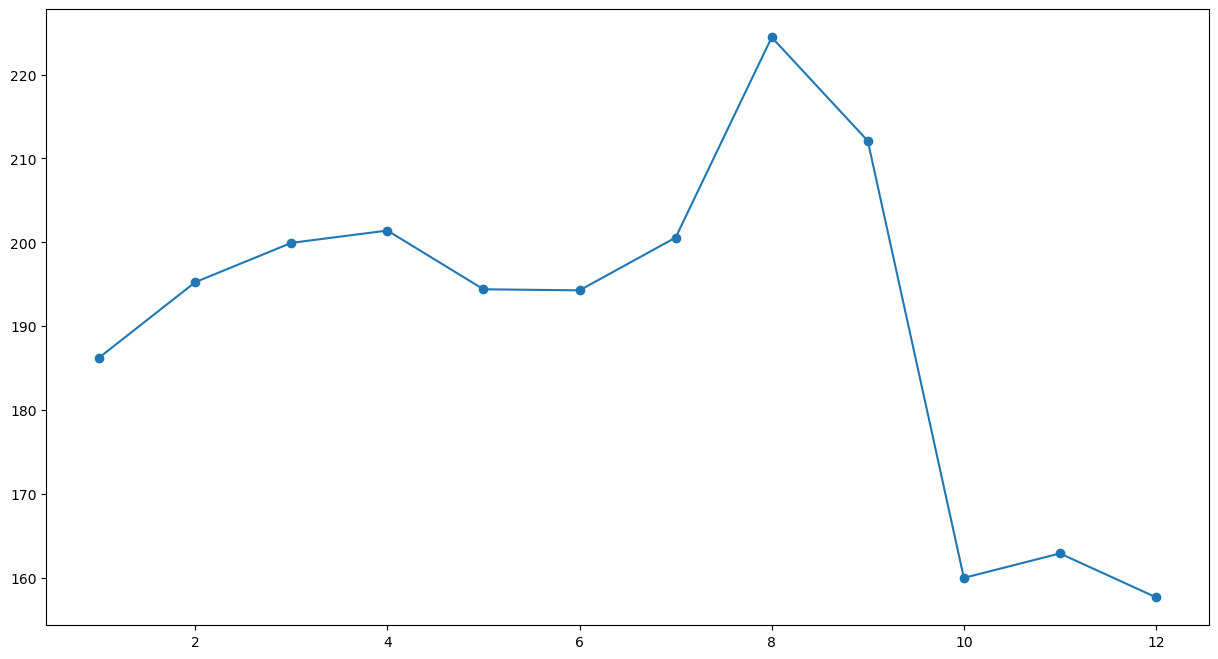

In [3]:
#2 This problem was solved by the inquiring Zhao Wangchao
data = pd.read_csv(r"C:\Program1\jupyter_notebook\ese5023\2281305.csv")
#Null removal
data['WND'] = data['WND'].dropna()
#Separate the values of each part by ","
# data['q'], data['w'], data['e'], data['r'], data['t'] = data['WND'].str.split(',').str # TA corrected: 此处不应有最后一个.str
data[['q','w','e','r','t']]= data['WND'].str.split(',',expand=True)
#The outlier 9999 is removed
data = data[data['q'] != 9999]
#Converts the date to datetime format
data["DATE"] = pd.to_datetime(data["DATE"], format="%Y-%m-%dT%H:%M:%S")  # Convert date column to datetime format
#Changing the q column value to a floating point number makes it computable
data['q'] = data['q'].astype(float)
#Monthly mean
months = data.groupby(data['DATE'].dt.month)['q'].mean()
plt.figure(figsize=(15,8))
m = range(1,13)
plt.plot(m, months, marker='o')
plt.show()
#The wind speed is higher in summer and lower in autumn and winter

=========================================
# 3 Free Exploration
12/15  
3.1 读取csv/xls/xlsx文件，并清理缺失/低质量数据 5/5  
3.2 画出某个变量的时间序列——代码报错（日期格式不匹配）；改正后TA的结果不一样 3/5  
3.3 对该变量进行至少5种简单的统计检验，并在报告中汇报你的发现——TA的结果不一样  4/5


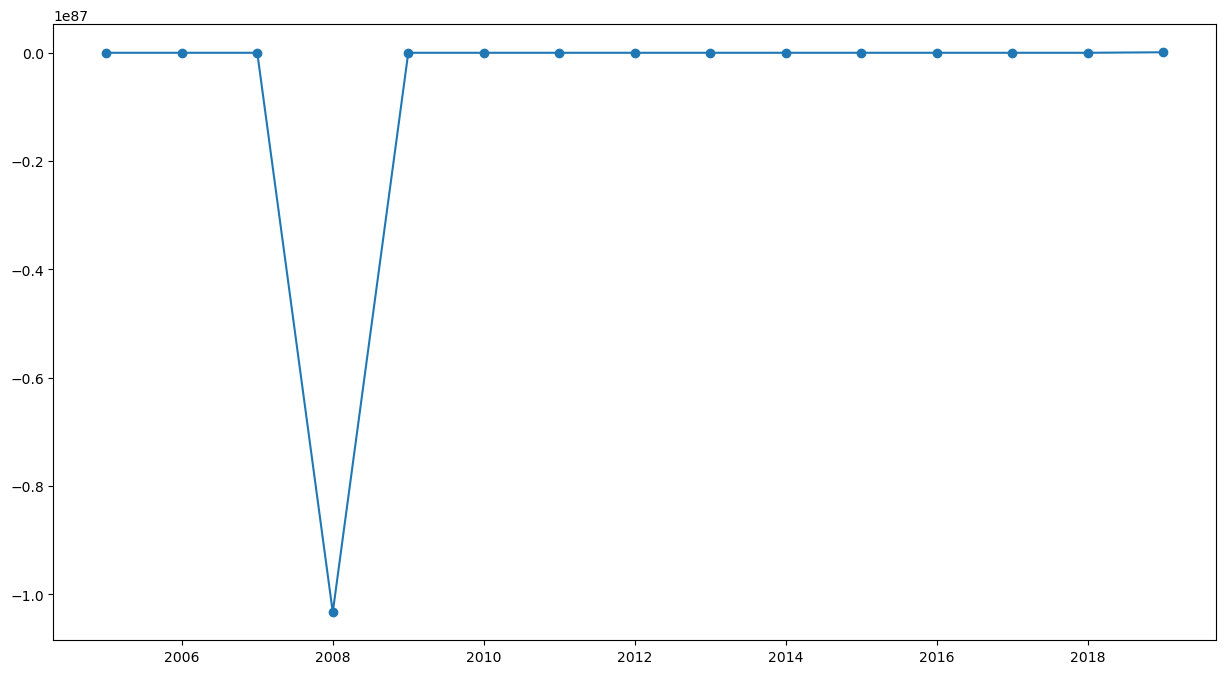

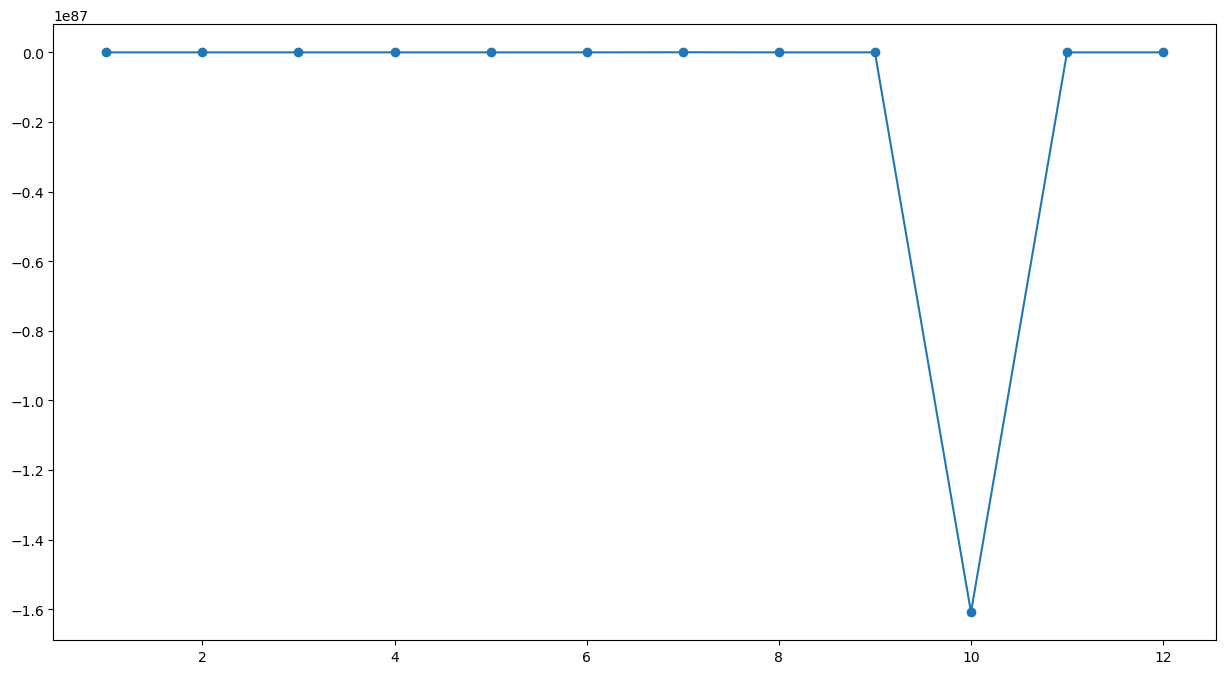

In [13]:
#3
data = pd.read_csv("NAMORS_EC_2005-2019.csv")  
#Null removal
data = data.dropna()
#Converts the date to datetime format
# data["date"] = pd.to_datetime(data["date"], format="%Y-%m-%d")  #TA comment:format不匹配
data["date"] = pd.to_datetime(data["date"], format="%Y/%m/%d")
#Remove untrusted values of 
data_h2o = data[data['qc_h2o_flux'] != 1]  
#Find the yearly average h2o_flux
year = data_h2o.groupby(data_h2o['date'].dt.year)['h2o_flux'].mean()
plt.figure(figsize=(15, 8))  
y = range(2005, 2020)  
plt.plot(y, year, marker='o')  
plt.show()
#Find the monthly average h2o_flux
months = data_h2o.groupby(data_h2o['date'].dt.month)['h2o_flux'].mean()
plt.figure(figsize=(15,8))  
m = range(1,13)
plt.plot(m, months, marker='o') 
plt.show()

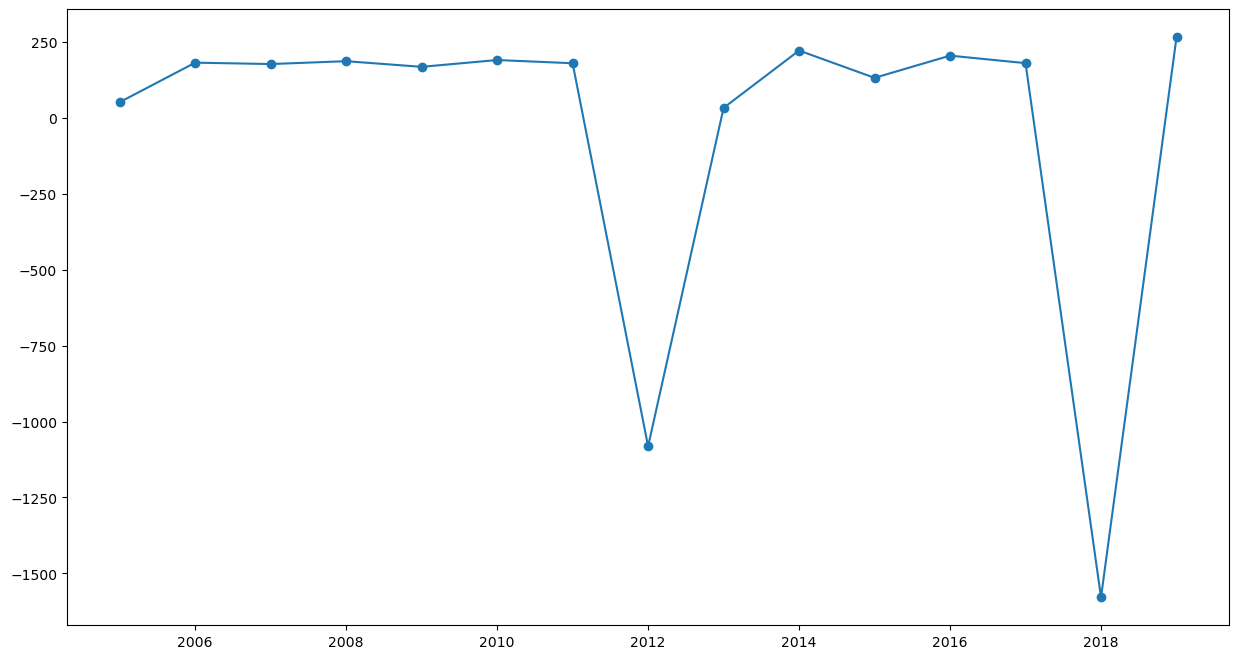

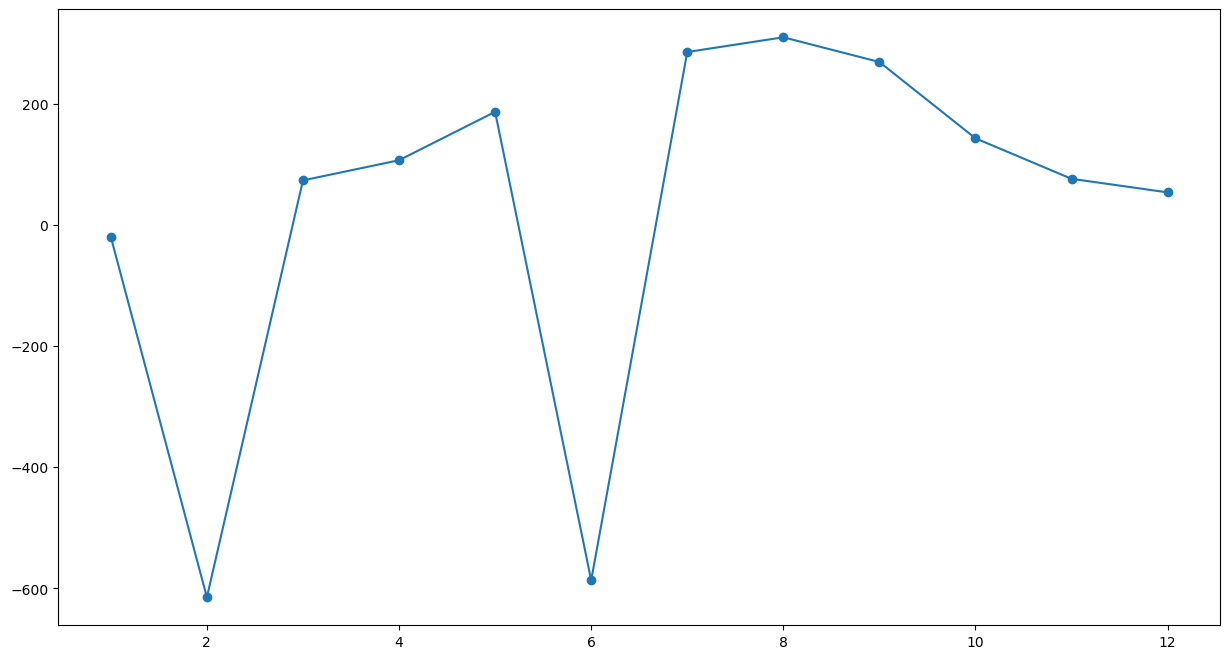

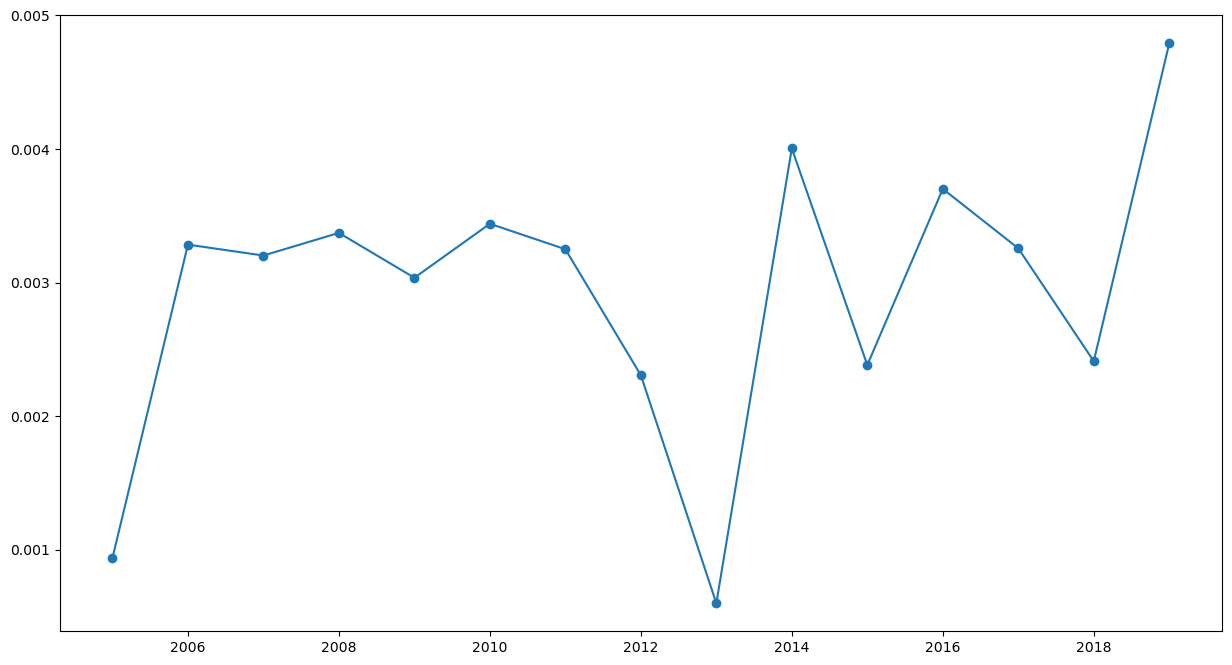

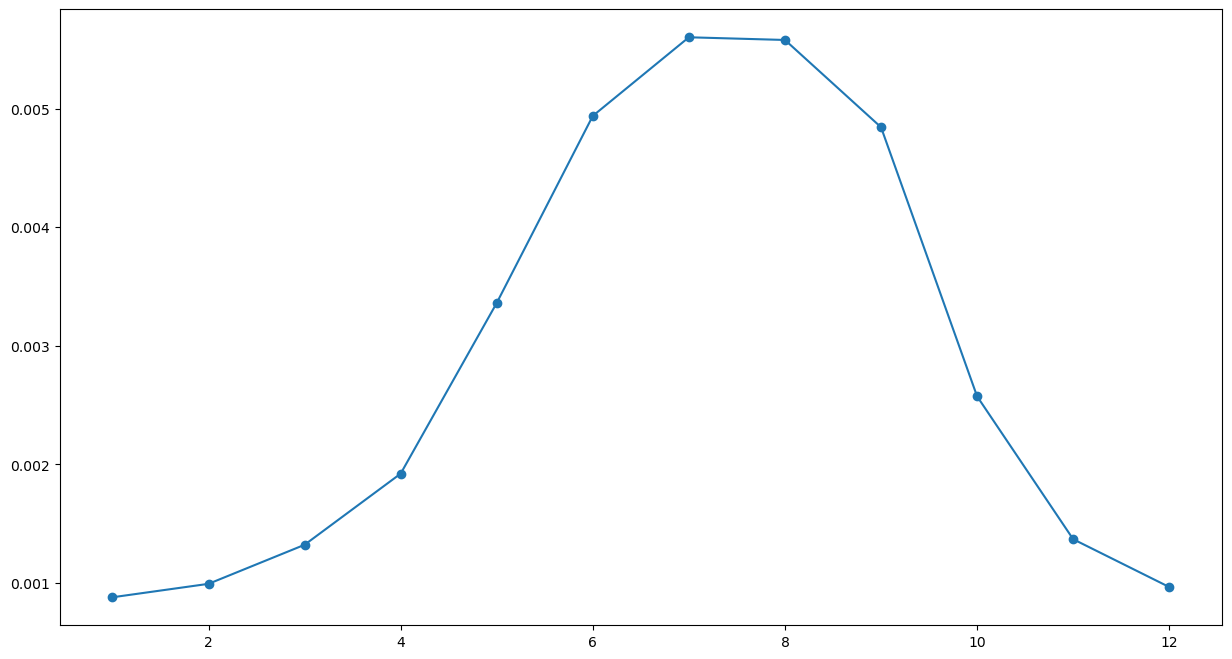

In [14]:
#Find the yearly average h2o_molar_density
year1 = data_h2o.groupby(data_h2o['date'].dt.year)['h2o_molar_density'].mean()
plt.figure(figsize=(15, 8))  
y = range(2005, 2020)  
plt.plot(y, year1, marker='o')  
plt.show() 
#Find the monthly average h2o_molar_density
months1 = data_h2o.groupby(data_h2o['date'].dt.month)['h2o_molar_density'].mean()
plt.figure(figsize=(15,8))  
m = range(1,13)
plt.plot(m, months1, marker='o') 
plt.show()
#Find the yearly average water_vapor_density
data_h2o['water_vapor_density'] = data_h2o['water_vapor_density'].astype(float)
year2 = data_h2o.groupby(data_h2o['date'].dt.year)['water_vapor_density'].mean()
plt.figure(figsize=(15, 8))  
y = range(2005, 2020)  
plt.plot(y, year2, marker='o')  
plt.show() 
#Find the monthly average water_vapor_density
months2 = data_h2o.groupby(data_h2o['date'].dt.month)['water_vapor_density'].mean()
plt.figure(figsize=(15,8))  
m = range(1,13)
plt.plot(m, months2, marker='o') 
plt.show()
#h2o_molar_density and water_vapor_density fluctuate greatly with the year but have no obvious upward or downward trend,
#while they are higher in summer and lower in winter.

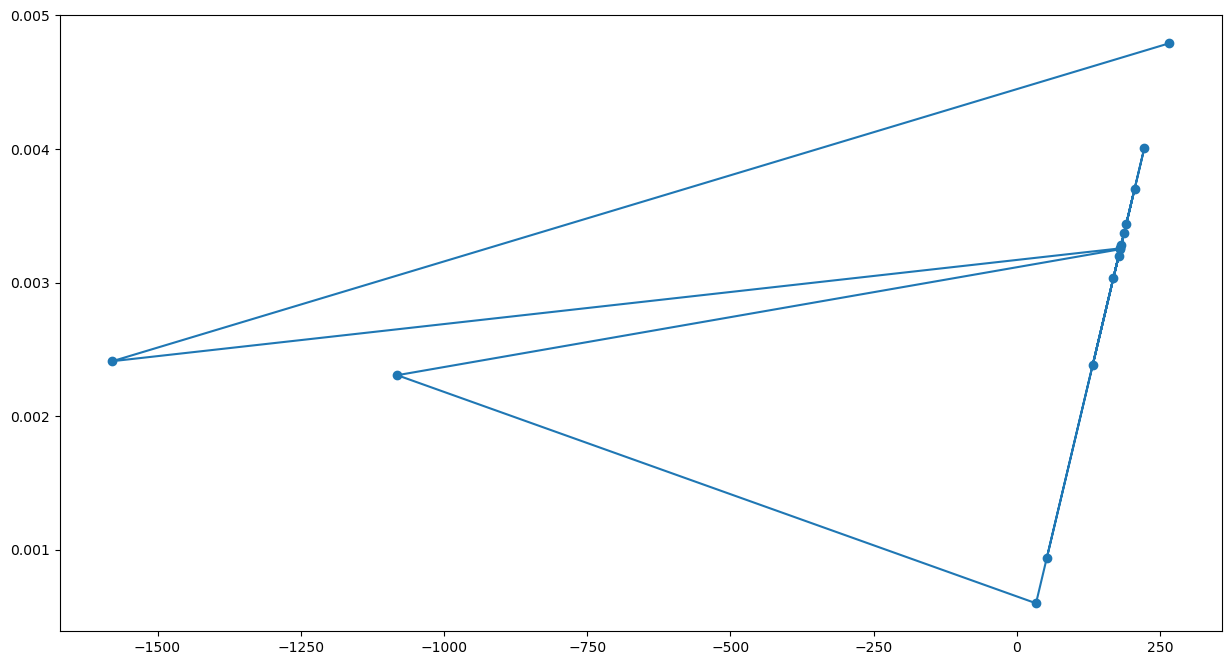

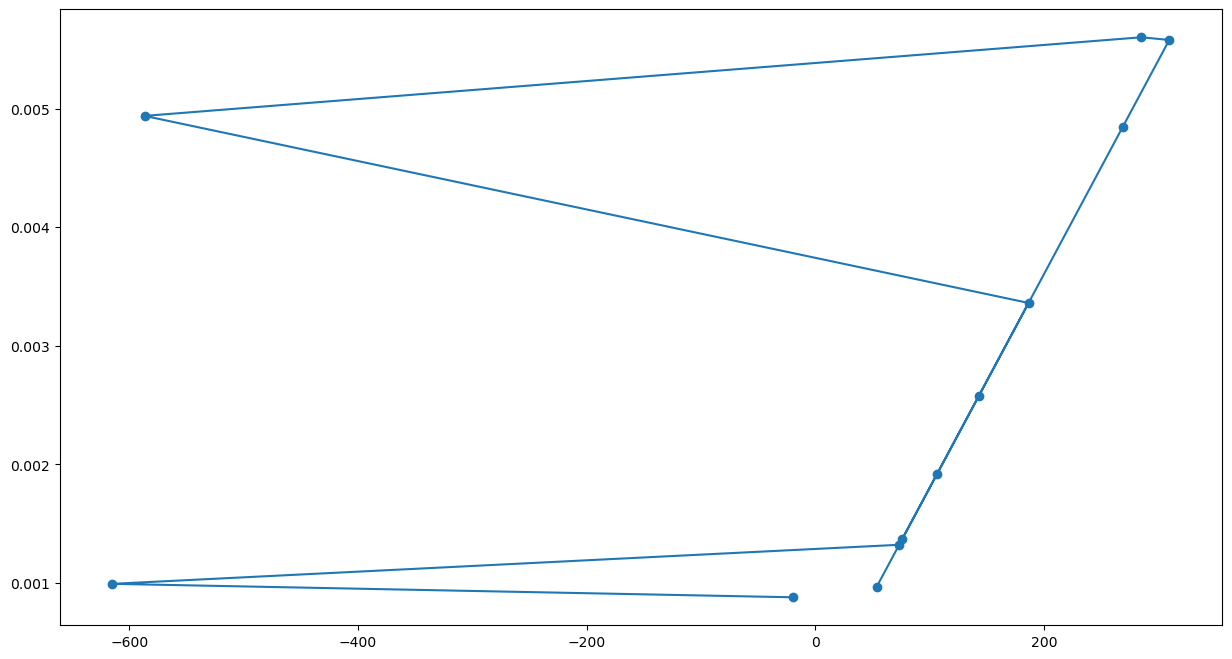

In [15]:
plt.figure(figsize=(15, 8))    
plt.plot(year1, year2, marker='o')  
plt.show() 
plt.figure(figsize=(15,8))  
plt.plot(months1, months2, marker='o') 
plt.show()
#h2o_molar_density and water_vapor_density have monthly and annual correlations